In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

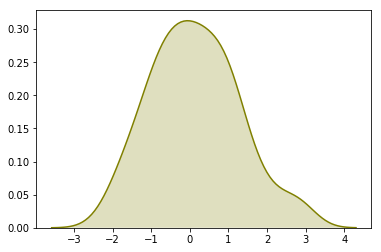

In [2]:
#2
N = 100
sns.kdeplot(np.random.normal(size=N), shade=True, color='olive')

In [3]:
N = 100
mixture = [np.random.choice([np.random.normal(0, 1), np.random.normal(6, 1), 
                             np.random.normal(-3, 1)]) for i in np.arange(N)]

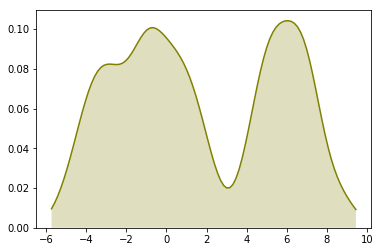

In [4]:
sns.kdeplot(mixture, bw = 0.2, shade=True, color='olive')

In [5]:
#4
N, M = 50, 100
X = np.random.rand(N)
boots_X = np.array([np.random.choice(X) for i in np.arange(M)])

In [6]:
mean = X.sum() / N
boots_mean = boots_X.sum() / M

print(mean, boots_mean)

var = (1 / N * ((X - mean)**2).sum())
boots_var = (mean - boots_mean)**2

print("S_2: ", var)
print("boots_S_2: ", boots_var)
print("S_2_N-1: ", var * N / (N - 1))

0.4797457560068155 0.471464667708833
S_2:  0.07794726848285251
boots_S_2:  6.857642339898302e-05
S_2_N-1:  0.07953802906413521


In [7]:
sort_X = np.sort(X)
med = (sort_X[N // 2] + sort_X[(N + 1)// 2])/ 2

sort_boots_X = np.sort(boots_X)
boots_med = (sort_boots_X[N // 2] + sort_boots_X[(N + 1)// 2])/ 2

print("MED varience: ", (boots_med - med)**2)

MED varience:  0.026704684382466846


In [8]:
#5
N, M = 100, 500
X = np.random.normal(size=N)
boots_X = np.array([np.random.choice(X) for i in np.arange(M)])

In [9]:
var = 1 / N * ((X - mean)**2).sum()
boots_var = 1 / M * ((boots_X - boots_mean)**2).sum()

print("boots_S_2: ", boots_var)
print("S_2 with bootstrap: ", 2 * var - boots_var)
print("S_2_N-1: ", var * N / (N - 1))



boots_S_2:  1.1262735862810604
S_2 with bootstrap:  1.040625594169518
S_2_N-1:  1.09439352548009


In [10]:
#6 how does work the pivotal method for bootstrap: studentized pivotal

In [11]:
#7
N = 100
X = np.random.rand(N)

def empirical_distribution(data, value):
    return 1 / data.size * (data < value).sum()

In [12]:
gato_var = 1 / N * ((((X < 1 / 3) - 0 - (X < 1 / 4) - 0) - 
                    (empirical_distribution(X, 1 / 3) - empirical_distribution(X, 1 / 4)))**2).sum() 

In [13]:
import scipy.stats as st

In [14]:
quant = st.norm.ppf(0.95)

left_border = empirical_distribution(X, 1 / 3) - empirical_distribution(X, 1 / 4) - gato_var * quant / np.sqrt(N)
right_border = empirical_distribution(X, 1 / 3) - empirical_distribution(X, 1 / 4) + gato_var * quant / np.sqrt(N)

print("(", left_border, right_border, ")")
print("The real value: ", 1 / 3 - 1 / 4)

( 0.05929200288854593 0.08070799711145409 )
The real value:  0.08333333333333331


In [15]:
#8 i need a help with example 9

In [2]:
#4.1
data = np.fromfile("Math16.txt", dtype=int, sep="\n")

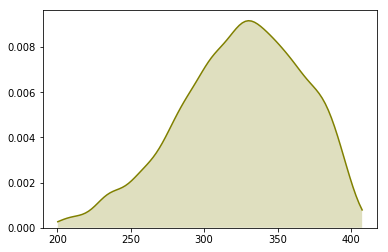

In [17]:
sns.kdeplot(data, bw = 0.2, shade=True, color='olive')

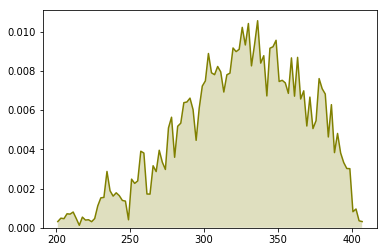

In [18]:
sns.kdeplot(data, bw = 0.02, shade=True, color='olive')

/home/antonzhiyanov/.local/lib/python3.6/site-packages/seaborn/distributions.py:289: UserWarning: Kernel other than `gau` requires statsmodels.
  warnings.warn(msg, UserWarning)


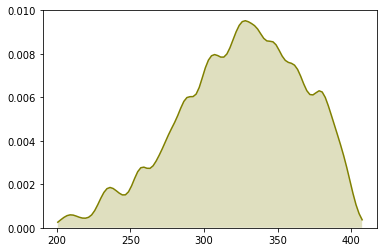

In [19]:
sns.kdeplot(data, bw = 0.1, shade=True, color='olive', kernel='epa')

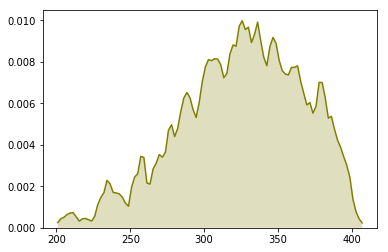

In [20]:
sns.kdeplot(data, bw = 0.04, shade=True, color='olive', kernel='epa')

(array([ 18.,  45.,  68., 126., 206., 262., 306., 252., 201.,  90.]),
 array([201. , 221.6, 242.2, 262.8, 283.4, 304. , 324.6, 345.2, 365.8,
        386.4, 407. ]),
 <a list of 10 Patch objects>)

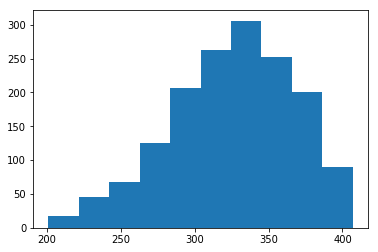

In [21]:
plt.hist(data)

(array([  9.,   9.,  11.,  34.,  25.,  43.,  52.,  74.,  98., 108., 131.,
        131., 153., 153., 132., 120., 102.,  99.,  67.,  23.]),
 array([201. , 211.3, 221.6, 231.9, 242.2, 252.5, 262.8, 273.1, 283.4,
        293.7, 304. , 314.3, 324.6, 334.9, 345.2, 355.5, 365.8, 376.1,
        386.4, 396.7, 407. ]),
 <a list of 20 Patch objects>)

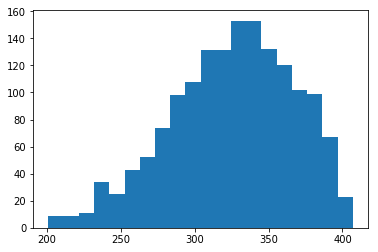

In [22]:
plt.hist(data, bins=20)

In [23]:
#4.2

In [3]:
#the estimation of the symmetry coeff: $~X^3 - 3*~X^2*~X + 3*~X*(~X)^2 + (~X)^3

def sym_coef(data):    
    return ((data ** 3).mean(axis=0) - 3 * (data ** 2).mean(axis=0) * data.mean(axis=0) +
        3 * (data.mean(axis=0) ** 2) * data.mean(axis=0) - (data.mean(axis=0)) ** 3) / (data.std(axis=0)) ** (3 / 2)

In [4]:
print(sym_coef(data))

-109.61037085361063


In [50]:
#bootstrap interval
#M = count of the sample data
N, M = len(data), 1000
sample_data = np.random.choice(data, N * M).reshape((N, M))
sample_coef_naive = np.sort(sym_coef(sample_data))
sample_coef_moved = np.sort(2 * sym_coef(data) - sym_coef(sample_data))

alpha = 0.05

In [51]:
print('(', sample_coef_naive[int(alpha * M)], ', ',
      sample_coef_naive[int((1 - alpha) * M)], ')')
print('(', sample_coef_moved[int(alpha * M)], ', ',
      sample_coef_moved[int((1 - alpha) * M)], ')')

( -129.26373161959623 ,  -89.59209372956707 )
( -129.60280997827078 ,  -89.8714345068941 )


In [52]:
Y = np.zeros(M)
for i in range(M):
    sample_data = np.random.choice(data, N)
    std = np.sqrt(((sym_coef(np.random.choice(sample_data, N * M).reshape((N, M))) - sym_coef(sample_data))**2).mean())
    Y[i] = (sym_coef(sample_data) - sym_coef(data)) / std

Y = np.sort(Y)
std_first = np.sqrt(((sym_coef(np.random.choice(data, N * M).reshape((N, M))) - sym_coef(data))**2).mean())

In [54]:
print('(', sym_coef(data) - (Y[int((1 - alpha) * M)]) * std_first, ', ',
      sym_coef(data) - (Y[int((alpha) * M)]) * std_first, ')')

( -130.191245321505 ,  -90.13694214521277 )


In [55]:
def derivation_gato(data, point):
    x, X = point, data
    dp = (x ** 3 - (X ** 3).mean() - 3 * ((x ** 2 - (X ** 2).mean()) * X.mean() + (X ** 2).mean()*(x - X.mean())) +
         3 * ((x - X.mean())*(X.mean())**2 + X.mean()*(2 * X.mean()) * (x - X.mean())) + 
         3 * (X.mean() ** 2) * (x - X.mean()))
    dq = 3 / 2 * (((X ** 2).mean() - X.mean()**2)** (1 / 2)) * (x ** 2 - (X ** 2).mean() - 2 * X.mean() * (x - X.mean()))
    
    p = ((data ** 3).mean() - 3 * (data ** 2).mean() * data.mean() +
        3 * (data.mean() ** 2) * data.mean() - (data.mean()) ** 3)
    q = data.std() ** (3 / 2)
    
    return (dp * q - p * dq) / (q ** 2)

In [34]:
sum_squared_dev = sum(list(map(lambda x: derivation_gato(data, x) ** 2, data))) / N

In [35]:
print(sum_squared_dev, sym_coef(data))

9377885156.935183 -109.61037085361063


In [36]:
from scipy.stats import norm

In [37]:
print('(', sym_coef(data) - sum_squared_dev * norm.ppf(0.95),
      ' ', sym_coef(data) + sum_squared_dev * norm.ppf(0.95), ')')

( -15425248523.129581   15425248303.90884 )
